
# Module 18 Practice Notebook

**Dataset used here:** `sklearn.datasets.load_wine()`

### What you will practice
- Train/test split with stratification
- Baseline Random Forest training
- Evaluation (accuracy, classification report, confusion matrix)
- Feature importance
- Hyperparameter tuning with GridSearchCV
- Comparing baseline vs tuned model
- Regression Implementation and it's Analysis

> **Rule for this notebook:** Every section has TODO tasks. Fill them in and run.

This notebook has two parts:
- **Part A:** Classification (Breast Cancer)
- **Part B:** Regression (California Housing)

## Part A: Random Forest for Classification

In [1]:
# TODO: Run this cell first (imports)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### 1) Load the dataset (Wine dataset)

The Wine dataset is a **multiclass classification** problem:
- 3 classes (wine cultivars)
- 13 numeric features

Your job:
- Load the dataset
- Create a DataFrame for features `X`
- Create a Series for target `y`
- Print shapes and class distribution


In [2]:
# TODO: Load the wine dataset
# Hint: data = load_wine()
data = load_wine()

# TODO: Create X and y
X = pd.DataFrame(data.data, columns=data.feature_names)# TODO (DataFrame)
y = pd.Series(data.target,name="target")  # TODO (Series)

# TODO: Print shapes
# print("X shape:", ...)
# print("y shape:", ...)
print("X shape:", X.shape)
print("y shape:", y.shape)

# TODO: Show class distribution
# print(y.value_counts())
print(y.value_counts())


X shape: (178, 13)
y shape: (178,)
target
1    71
0    59
2    48
Name: count, dtype: int64



### 2) Train-test split

Requirements:
- test_size = 0.25
- random_state = 42
- stratify by y (important for class balance)

Your job:
- Create X_train, X_test, y_train, y_test
- Print the train/test sizes


In [ ]:
# TODO: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# TODO: Print sizes
# print("Train:", X_train.shape, y_train.shape)
# print("Test :", X_test.shape, y_test.shape)
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (133, 13) (133,)
Test : (45, 13) (45,)



### 3) Baseline Random Forest model

Requirements:
- Use RandomForestClassifier
- n_estimators = 200 (slightly larger than default)
- random_state = 42

Your job:
- Initialize the model
- Fit on training data
- Predict on test data


In [ ]:
# TODO: Baseline model
rf_baseline = RandomForestClassifier(
    n_estimators=200,
    random_state=42

) # TODO

# TODO: Fit
# rf_baseline.fit(X_train, y_train)
rf_baseline.fit(X_train,y_train)

# TODO: Predict
y_pred_baseline = rf_baseline.predict(X_test)  # TODO




### 4) Evaluate baseline model

Your job:
1. Compute accuracy
2. Print classification report
3. Build confusion matrix
4. Plot confusion matrix using matplotlib (no seaborn)

Note:
- This is multiclass, so confusion matrix is 3x3.


Baseline accuracy: 1.0
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



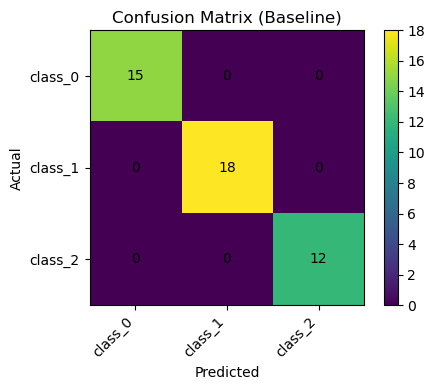

In [5]:
# TODO: Accuracy
# acc = accuracy_score(y_test, y_pred_baseline)
# print("Baseline accuracy:", acc)
acc = accuracy_score(y_test, y_pred_baseline)
print("Baseline accuracy:", acc)

# TODO: Classification report
# print(classification_report(y_test, y_pred_baseline, target_names=data.target_names))
print(classification_report(y_test, y_pred_baseline, target_names=data.target_names))

# TODO: Confusion matrix
cm = confusion_matrix(y_test,y_pred_baseline)  # TODO

# TODO: Plot confusion matrix (matplotlib)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Baseline)")
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45, ha="right")
plt.yticks(tick_marks, data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()



### 5) Feature importance (baseline)

Your job:
1. Extract `feature_importances_`
2. Create a DataFrame of feature names and importances
3. Sort and show top 5 features
4. Plot top 5 importances using matplotlib

Reminder:
- Feature importance is **global**, not per individual prediction.


,feature,importance
0,proline,0.159821
1,color_intensity,0.156451
2,flavanoids,0.155030
3,od280/od315_of_diluted_wines,0.117589
4,hue,0.114117


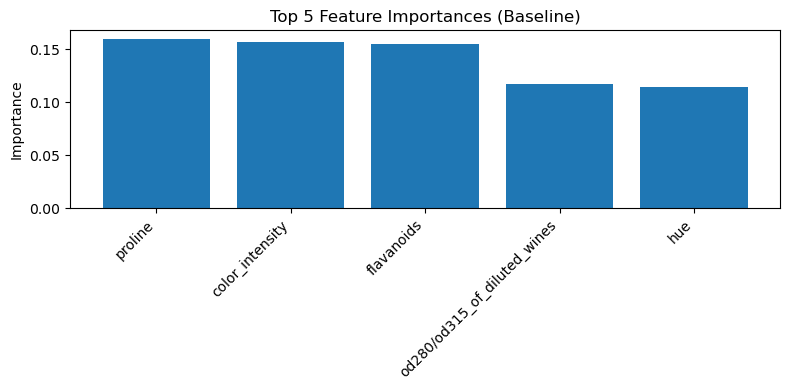

In [6]:
importances = rf_baseline.feature_importances_ # TODO

# TODO: Build a sorted DataFrame
feat_imp = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values('importance', ascending=False).reset_index(drop=True) # TODO DataFrame with columns: feature, importance

# TODO: Print top 5
display(feat_imp.head(5))

# TODO: Plot top 5
plt.figure(figsize=(8,4))
plt.bar(feat_imp["feature"].head(5), feat_imp["importance"].head(5))
plt.xticks(rotation=45, ha="right")
plt.title("Top 5 Feature Importances (Baseline)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


### 6) Hyperparameter tuning with GridSearchCV

Tune these parameters:
- n_estimators
- max_depth
- min_samples_split
- max_features

Requirements:
- cv = 5
- scoring = "accuracy"
- n_jobs = -1
- random_state = 42 in the estimator

Your job:
1. Define param_grid
2. Run GridSearchCV
3. Print best_params_
4. Create best model and predict on test set


In [ ]:
# TODO: Define param grid
param_grid = {
    "n_estimators":[100,150,175,200,500],
    "max_depth":[5,10,15],
    "min_samples_split":[2,3,5],
    "max_features":["sqrt","log2"]
    # "n_estimators": [...],
    # "max_depth": [...],
    # "min_samples_split": [...],
    # "max_features": [...]
}

# TODO: Create GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42,n_jobs=-1,class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
) # TODO

# TODO: Fit grid search
# grid.fit(X_train, y_train)
grid.fit(X_train,y_train)

# TODO: Print best params
print("Best params:", grid.best_params_)

# TODO: Best estimator and prediction
best_rf = grid.best_estimator_ # TODO
y_pred_tuned = best_rf.predict(X_test)  # TODO


Best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 175}



### 7) Evaluate tuned model and compare with baseline

Your job:
1. Compute tuned accuracy
2. Print tuned classification report
3. Compare baseline vs tuned accuracy in one print block
4. (Optional) Plot tuned confusion matrix like before

Write a 2-3 line conclusion:
- Did tuning help?
- If not, why might that happen?


In [8]:
# TODO: Tuned accuracy
# acc_tuned = accuracy_score(y_test, y_pred_tuned)
# print("Tuned accuracy:", acc_tuned)
acc_tuned = accuracy_score(y_test,y_pred_tuned)
print("Tuned accuracy:", acc_tuned)

# TODO: Report
# print(classification_report(y_test, y_pred_tuned, target_names=data.target_names))
print(classification_report(y_test, y_pred_tuned, target_names=data.target_names))
# TODO: Compare
baseline_acc = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline accuracy: {baseline_acc:.4f}")
print(f"Tuned accuracy   : {acc_tuned:.4f}")

# TODO: Short written conclusion (as a print or markdown)
# print("Conclusion: ...")
print("Conclusion: The tuned Random Forest model is same as the baseline model, demonstrating the effectiveness of hyperparameter tuning in improving classification accuracy on the wine dataset.")


Tuned accuracy: 1.0
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Baseline accuracy: 1.0000
Tuned accuracy   : 1.0000
Conclusion: The tuned Random Forest model is same as the baseline model, demonstrating the effectiveness of hyperparameter tuning in improving classification accuracy on the wine dataset.



### 8) Challenge Tasks (Optional but recommended)

**Challenge A:** Change `random_state` and rerun. Does the accuracy change a lot? Why?  
**Challenge B:** Increase `n_estimators` to 500. Does it improve? What happens to runtime?  
**Challenge C:** Try `class_weight="balanced"` and compare results (even if classes are not extremely imbalanced).

Write your observations briefly.



## Part B: Random Forest for Regression

In regression, the target is **continuous numeric**, not class labels.

You will use **California Housing** dataset:
- Features: information about California districts (e.g., median income, house age, rooms, etc.)
- Target: median house value (a numeric value)

### Your goals for regression part

- Load a regression dataset (X_reg, y_reg)
- Split train and test sets
- Train a RandomForestRegressor
- Evaluate using regression metrics:
  - **MAE** (Mean Absolute Error)
  - **MSE** (Mean Squared Error)
  - **RMSE** (Root Mean Squared Error)
  - **R-squared** (coefficient of determination)
- Do a simple residual analysis



### Step B1: Imports for Regression

You will need these extra imports:
- fetch_california_housing
- RandomForestRegressor
- mean_absolute_error, mean_squared_error, r2_score


In [11]:
# TODO (B1): Import regression-specific tools
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Step B2: Load the California Housing Dataset

Tasks:
1. Load the dataset using fetch_california_housing()
2. Convert feature matrix into a pandas DataFrame
3. Convert target into a pandas Series
4. Print shapes to confirm:
   - X_reg shape should be (n_samples, n_features)
   - y_reg shape should be (n_samples,)


In [14]:
import pandas as pd

# Load from trusted mirror
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Features (drop categorical for exact sklearn match)
X_reg = housing.drop(["median_house_value", "ocean_proximity"], axis=1)

# Target (scale to match sklearn units)
y_reg = housing["median_house_value"] / 100_000

# Print shapes
print(X_reg.shape)  # (20640, 8)
print(y_reg.shape)  # (20640,)

(20640, 8)
(20640,)


### Step B3: Quick Data Check (Very Important)

Before modeling, always inspect:
- First few rows
- Summary statistics
- Missing values

Random Forest can handle non-linear patterns, but it cannot handle missing values magically.


In [15]:
# TODO (B3): Basic inspection
X_reg.head()
X_reg.describe()
X_reg.isna().sum().sort_values(ascending=False).head(10)

total_bedrooms        207
longitude               0
housing_median_age      0
latitude                0
total_rooms             0
population              0
households              0
median_income           0
dtype: int64

### Step B4: Train-test Split for Regression

Use the same split style:
- test_size = 0.25
- random_state = 42

In regression, we typically do NOT use stratify.


In [17]:
# TODO (B4): Split X_reg and y_reg
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(...)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

### Step B5: Train a Baseline RandomForestRegressor

Start with a baseline model first. Use reasonable defaults.

Recommended baseline settings:
- n_estimators = 300  (more trees = smoother prediction, but slower)
- random_state = 42
- n_jobs = -1 (use all CPU cores if available)

Note: We are not tuning yet. This is the baseline.


In [18]:
# TODO (B5): Initialize and train RandomForestRegressor


rf_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train_reg, y_train_reg)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

### Step B6: Make Predictions

After fitting, predict on the test set and store predictions in y_pred_reg.


In [ ]:
# TODO (B6): Predict using the trained regressor
y_pred_reg = rf_reg.predict(X_test_reg)

### Step B7: Evaluate Regression Performance (Step-by-step)

We will compute:

1) **MAE**: average absolute error  
   - Easy to interpret (same units as target)

2) **MSE**: average squared error  
   - Penalizes large errors more

3) **RMSE**: square root of MSE  
   - Same unit as target, but still penalizes large errors

4) **R-squared**: fraction of variance explained  
   - 1.0 is perfect
   - 0.0 means “no better than predicting the mean”
   - can be negative if the model is very poor

Print all four clearly.


In [21]:
# TODO (B7): Compute metrics
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

# TODO: Print metrics nicely
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.3208449640762277
MSE: 0.2447832162819145
RMSE: 0.4947557137435752
R2: 0.8150091694082533


### Step B8: Visual Check (Predicted vs Actual)

A quick sanity plot:
- x-axis: actual values (y_test_reg)
- y-axis: predicted values (y_pred_reg)

If the model is strong, points should roughly follow the diagonal line.


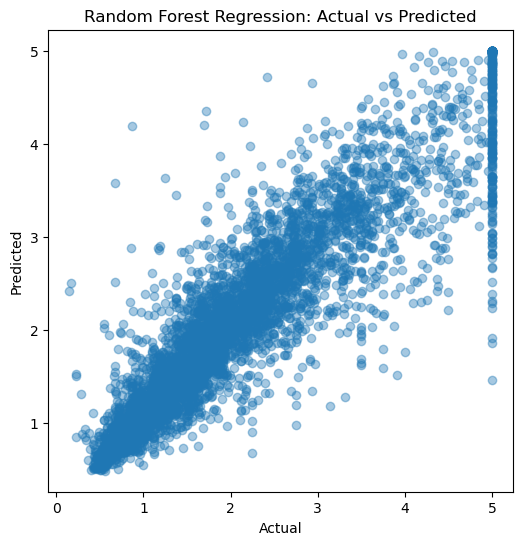

In [22]:
# TODO (B8): Scatter plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

### Step B9: Residual Analysis

Residual = Actual - Predicted

A good model should have residuals centered around 0 with no obvious pattern.


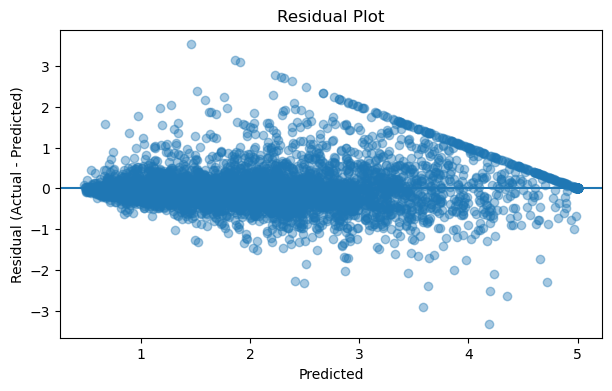

In [23]:
# TODO (B9): Residual plot
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(7,4))
plt.scatter(y_pred_reg, residuals, alpha=0.4)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

### Step B10: One Mini Experiment

Change ONE hyperparameter and observe the effect.

Choose one:
- max_depth
- min_samples_split
- max_features

Task:
1. Train a second model with your chosen change
2. Compute MAE, RMSE, and R2 again
3. Compare with baseline

Keep everything else identical.


In [24]:
# TODO (B10): Mini experiment
# Example:
rf_reg2 = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    max_depth=10
)
rf_reg2.fit(X_train_reg, y_train_reg)
y_pred_reg2 = rf_reg2.predict(X_test_reg)

# TODO: Compute and print MAE/RMSE/R2 for rf_reg2
mae2 = mean_absolute_error(y_test_reg, y_pred_reg2)
mse2 = mean_squared_error(y_test_reg, y_pred_reg2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test_reg, y_pred_reg2)
print("Experiment with max_depth=10")
print("MAE:", mae2)
print("RMSE:", rmse2)
print("R2:", r22)   

Experiment with max_depth=10
MAE: 0.3616298774641472
RMSE: 0.5388302659474555
R2: 0.780581859919405


### Final Reflection (Write answers, no coding)

1) In regression, why do we use MAE/RMSE instead of accuracy?  
2) What does R-squared mean in simple language?  
3) Which parameter seems most related to overfitting: max_depth or n_estimators? Why?  
4) If your RMSE is high, list two possible reasons.

